In [2]:
import sys
sys.path.append('../..')

In [3]:
from pde.grids import UnitGrid
from pde.fields import ScalarField, FieldCollection
from pde.pdes import DiffusionPDE
from pde.solvers import ScipySolver, ExplicitSolver
from pde.controller import Controller

# initialize the grid, an initial condition, and the PDE
grid = UnitGrid([32, 32])
field = ScalarField.random_uniform(grid, -1, 1)
eq = DiffusionPDE()

In [4]:
# try our explicit solver
solver = ExplicitSolver(eq)
controller = Controller(solver, t_range=1)
sol1 = controller.run(field, dt=1e-3);

In [5]:
# try the standard scipy solver
solver = ScipySolver(eq)
controller = Controller(solver, t_range=1)
sol2 = controller.run(field);

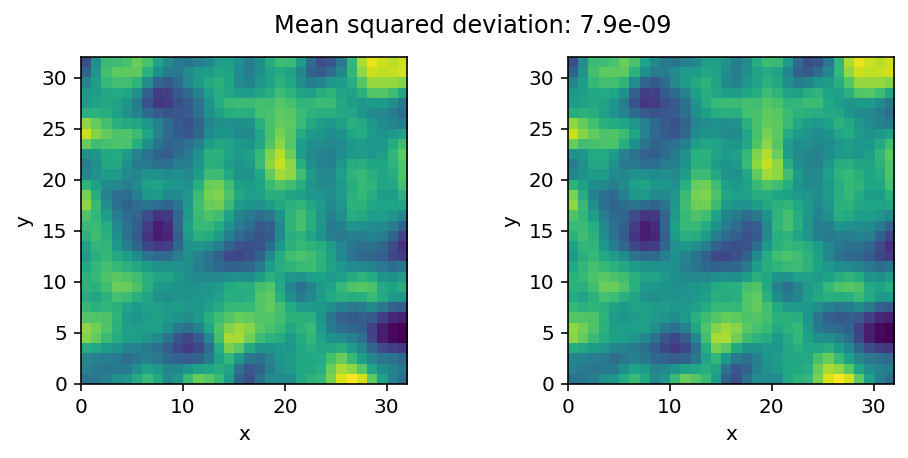

In [6]:
# plot both fields and give the deviation as the title
title = f'Mean squared deviation: {((sol1 - sol2)**2).average:.2g}'
FieldCollection([sol1, sol2]).plot(title=title)